# Bài 1:

In [1]:
import numpy as np
data = np.array([[10,39,19,23,28],[43,13,32,21,20]])
cov_matrix = np.cov(data)
print(cov_matrix)

[[ 115.7  -120.55]
 [-120.55  138.7 ]]


# Bài 2:

In [2]:
data_v2 = np.array([[1,-1,4],[2,1,3],[1,3,-1]])
cov_matrix_v2 = np.cov(data_v2)
print(cov_matrix_v2)

[[ 6.33333333  2.5        -5.        ]
 [ 2.5         1.         -2.        ]
 [-5.         -2.          4.        ]]


# Bài 3:

### 3.1

In [3]:
matrix_3_1 = np.array([[2, -4], [3, -6]])
eigenvalues_3_1, eigenvectors_3_1 = np.linalg.eig(matrix_3_1)
print("Eigenvalues :", eigenvalues_3_1)
print("Eigenvectors :")
print(eigenvectors_3_1)

Eigenvalues : [ 0. -4.]
Eigenvectors :
[[0.89442719 0.5547002 ]
 [0.4472136  0.83205029]]


In [4]:
matrix_3_2 = np.array([[2, -12], [1, -5]])
eigenvalues_3_2, eigenvectors_3_2 = np.linalg.eig(matrix_3_2)
print("\nEigenvalues của ví dụ 3.2:", eigenvalues_3_2)
print("Eigenvectors của ví dụ 3.2:")
print(eigenvectors_3_2)


Eigenvalues của ví dụ 3.2: [-1. -2.]
Eigenvectors của ví dụ 3.2:
[[0.9701425  0.9486833 ]
 [0.24253563 0.31622777]]


In [5]:
matrix_3_3 = np.array([[2, 1, 0], [0, 2, 0], [0, 0, 2]])
eigenvalues_3_3, eigenvectors_3_3 = np.linalg.eig(matrix_3_3)
print("\nEigenvalues của ví dụ 3.3:", eigenvalues_3_3)
print("Eigenvectors của ví dụ 3.3:")
print(eigenvectors_3_3)


Eigenvalues của ví dụ 3.3: [2. 2. 2.]
Eigenvectors của ví dụ 3.3:
[[ 1.0000000e+00 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  4.4408921e-16  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [6]:
def calculate_eigen(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

matrix = matrix_3_1 
eigenvalues, eigenvectors = calculate_eigen(matrix)
print("\nEigenvalues của ma trận đầu vào:")
print(eigenvalues)
print("Eigenvectors của ma trận đầu vào:")
print(eigenvectors)



Eigenvalues của ma trận đầu vào:
[ 0. -4.]
Eigenvectors của ma trận đầu vào:
[[0.89442719 0.5547002 ]
 [0.4472136  0.83205029]]


# Bài 4:

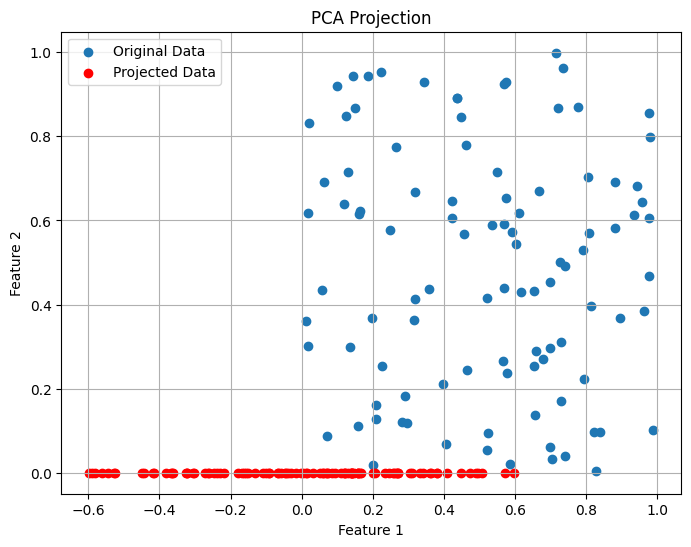

In [7]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        
    def fit(self, X):
        # Tính vector trung bình của dữ liệu
        self.mean = np.mean(X, axis=0)
        
        # Trừ đi vector trung bình để chuẩn bị dữ liệu cho việc tính covariance
        centered_data = X - self.mean
        
        # Tính ma trận hiệp phương sai
        covariance_matrix = np.cov(centered_data, rowvar=False)
        
        # Tính eigenvectors và eigenvalues của ma trận hiệp phương sai
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        
        # Sắp xếp các eigenvectors theo eigenvalues giảm dần
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]
        
        # Chọn các top r eigenvectors
        self.components = sorted_eigenvectors[:, :self.n_components]
        
    def transform(self, X):
        # Chiếu dữ liệu vào không gian con được sinh bởi các eigenvectors đã chọn
        centered_data = X - self.mean
        projected_data = np.dot(centered_data, self.components)
        return projected_data

# Tạo dữ liệu mẫu
np.random.seed(0)
X = np.random.rand(100, 2)  # Dữ liệu 2 chiều, 100 điểm

# Áp dụng PCA với số thành phần mới là 1
pca = PCA(n_components=1)
pca.fit(X)
projected_X = pca.transform(X)

# Vẽ biểu đồ trực quan
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.scatter(projected_X[:, 0], np.zeros_like(projected_X), label='Projected Data', color='red')
plt.title('PCA Projection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# Bài 5:

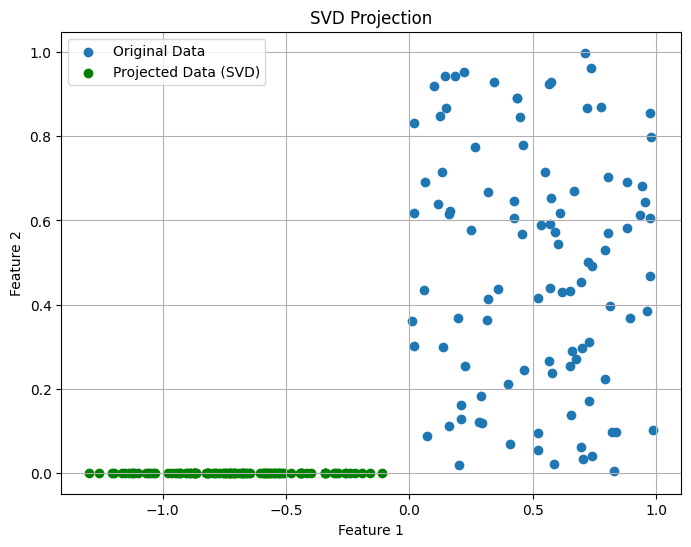

In [8]:
import numpy as np

class SVD:
    def __init__(self, n_components):
        self.n_components = n_components
        self.U = None
        self.S = None
        self.Vt = None
        
    def fit(self, X):
        # Thực hiện SVD trên ma trận dữ liệu X
        self.U, self.S, self.Vt = np.linalg.svd(X, full_matrices=False)
        
        # Chọn các top r singular values và tương ứng eigenvectors
        self.U = self.U[:, :self.n_components]
        self.S = np.diag(self.S[:self.n_components])
        self.Vt = self.Vt[:self.n_components, :]
        
    def transform(self, X):
        # Chiếu dữ liệu vào không gian con được sinh bởi các singular vectors đã chọn
        projected_data = np.dot(X, self.Vt.T)
        return projected_data

# Áp dụng SVD vào bộ dữ liệu đã sử dụng trong bài 4
svd = SVD(n_components=1)
svd.fit(X)
projected_X_svd = svd.transform(X)

# Vẽ biểu đồ trực quan
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.scatter(projected_X_svd[:, 0], np.zeros_like(projected_X_svd), label='Projected Data (SVD)', color='green')
plt.title('SVD Projection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# END